In [1]:
#!sudo pip install --upgrade pixiedust

In [2]:
# set up python ecosystem
import json
from math import *
import pandas as pd
import numpy as np
from IPython.core.display import HTML, display
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import stats

import pixiedust
from pixiedust.display import *

Pixiedust database opened successfully


In [3]:
# set maximum number of rows to display from a pandas data frame
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 50)

In [4]:
# inpout data
datafile = 'data/SM2/2018.05.RockParameters.SM2.csv'

# rename column Source.1 to Source_2  # !!! 

In [5]:
#df = pd.read_csv(datafile, names=names)
#data_df = pd.read_csv(datafile, parse_dates=True, dayfirst=True)
data_df = pd.read_csv(datafile, dayfirst=True)
print(data_df.count())

#at present, executing the statements below deletes data for faults and similar features
#data_df = data_df.dropna(subset=['UCS_avg_2'])     #drop all rows that have any NaN values
#print(data_df.count())

ID                   14
Source               14
Rock Unit            14
Rock Unit Code       14
Rock Type            14
chainage             14
UCS_min              14
UCS_max              14
UCS_avg              14
GSI_min              14
GSI_max              14
GSI_avg              14
GW_inflow             0
GW_pressure           0
sigma_ratio           0
SRF                   0
sta_top               0
sta_bottom            0
azimuth               0
dip                   0
Risk Situations       0
SM classification     0
SM ground rating      0
Excv. Class           0
Source_2              9
UCS_avg_2             9
E_intact              9
MR                    9
GSI_avg_2             9
UCS_m                 9
E_m                   9
sigma_t               9
UCS_ratio             9
E_ratio               9
dtype: int64


In [6]:
data_df
#data_df.head()

,ID,Source,Rock Unit,Rock Unit Code,Rock Type,chainage,UCS_min,UCS_max,UCS_avg,GSI_min,GSI_max,GSI_avg,GW_inflow,GW_pressure,sigma_ratio,SRF,sta_top,sta_bottom,azimuth,dip,Risk Situations,SM classification,SM ground rating,Excv. Class,Source_2,UCS_avg_2,E_intact,MR,GSI_avg_2,UCS_m,E_m,sigma_t,UCS_ratio,E_ratio
0,1,Feasibility Study Report 2017,Kellys Plain Volcanics,Dkv,"dacite, rhyolite, tuff",0–600,80,200,120,55,70,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,80.0,32000.0,400.0,75.0,20.0,26000.0,0.5,0.3,0.8
1,2,Feasibility Study Report 2017,Tantangara Formation,Syn-I,"sandstone, siltstone, shale",600–3000,20,100,50,20,55,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,50.0,12500.0,250.0,60.0,5.0,6500.0,0.2,0.1,0.5
2,3,Feasibility Study Report 2017,Tantangara Formation,Syn-II,"sandstone, siltstone, shale",3000–7740,50,100,65,35,55,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,50.0,12500.0,250.0,60.0,5.0,6500.0,0.2,0.1,0.5
3,4,Feasibility Study Report 2017,"Tantangara Formation faulted, sheared, or weat...",Syn-II,"sandstone, siltstone, shale","500–950, 2500–2600, 4030–4130, 5200–5300, 7700...",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Feasibility Study Report 2017,Temperance Formation,Oitd-I,"tuff, chert, arenite",7740–9850,80,150,100,40,70,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,100.0,35000.0,350.0,80.0,33.0,31000.0,1.1,0.3,0.9
5,6,Feasibility Study Report 2017,"Temperance Formation faulted, sheared, or weat...",Oitd-I,"tuff, chert, arenite","7750–7800, 8800–8850",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Feasibility Study Report 2017,Boggy Plains Granite,Dgk2-I,granite,"8100–8300, 8850–9330",80,150,100,40,70,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,100.0,42500.0,425.0,80.0,33.0,37000.0,0.7,0.3,0.9
7,8,Feasibility Study Report 2017,Boggy Plains Granite alteration zones,Dgk2-II,granite,"8050–8100, 8350–8400",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Feasibility Study Report 2017,Gooandra Volcanics,Oigl-I,"basalt pillow lava, rhyolite, schist, sandston...",9850–14250,60,200,120,45,75,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pells Sullivan Meynink 2018,50.0,19000.0,380.0,60.0,5.0,10000.0,0.1,0.1,0.5
9,10,Feasibility Study Report 2017,"Gooandra Volcanics faulted, sheared, or weathered",Oigl-I,"basalt pillow lava, rhyolite, schist, sandston...","9330–9380, 9850–9900─ 10700–10800",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_sel_df = data_df[
['ID','Source','Rock Unit','Rock Unit Code','Rock Type','UCS_min','UCS_max','UCS_avg',
 'GSI_min','GSI_max','GSI_avg','Source_2','UCS_avg_2','E_intact','MR','GSI_avg_2','UCS_m','E_m',
 'sigma_t','UCS_ratio','E_ratio']
]

data_sel_df

,ID,Source,Rock Unit,Rock Unit Code,Rock Type,UCS_min,UCS_max,UCS_avg,GSI_min,GSI_max,GSI_avg,Source_2,UCS_avg_2,E_intact,MR,GSI_avg_2,UCS_m,E_m,sigma_t,UCS_ratio,E_ratio
0,1,Feasibility Study Report 2017,Kellys Plain Volcanics,Dkv,"dacite, rhyolite, tuff",80,200,120,55,70,60,Pells Sullivan Meynink 2018,80.0,32000.0,400.0,75.0,20.0,26000.0,0.5,0.3,0.8
1,2,Feasibility Study Report 2017,Tantangara Formation,Syn-I,"sandstone, siltstone, shale",20,100,50,20,55,40,Pells Sullivan Meynink 2018,50.0,12500.0,250.0,60.0,5.0,6500.0,0.2,0.1,0.5
2,3,Feasibility Study Report 2017,Tantangara Formation,Syn-II,"sandstone, siltstone, shale",50,100,65,35,55,45,Pells Sullivan Meynink 2018,50.0,12500.0,250.0,60.0,5.0,6500.0,0.2,0.1,0.5
3,4,Feasibility Study Report 2017,"Tantangara Formation faulted, sheared, or weat...",Syn-II,"sandstone, siltstone, shale",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Feasibility Study Report 2017,Temperance Formation,Oitd-I,"tuff, chert, arenite",80,150,100,40,70,65,Pells Sullivan Meynink 2018,100.0,35000.0,350.0,80.0,33.0,31000.0,1.1,0.3,0.9
5,6,Feasibility Study Report 2017,"Temperance Formation faulted, sheared, or weat...",Oitd-I,"tuff, chert, arenite",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Feasibility Study Report 2017,Boggy Plains Granite,Dgk2-I,granite,80,150,100,40,70,65,Pells Sullivan Meynink 2018,100.0,42500.0,425.0,80.0,33.0,37000.0,0.7,0.3,0.9
7,8,Feasibility Study Report 2017,Boggy Plains Granite alteration zones,Dgk2-II,granite,5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Feasibility Study Report 2017,Gooandra Volcanics,Oigl-I,"basalt pillow lava, rhyolite, schist, sandston...",60,200,120,45,75,65,Pells Sullivan Meynink 2018,50.0,19000.0,380.0,60.0,5.0,10000.0,0.1,0.1,0.5
9,10,Feasibility Study Report 2017,"Gooandra Volcanics faulted, sheared, or weathered",Oigl-I,"basalt pillow lava, rhyolite, schist, sandston...",5,10,7,5,25,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')


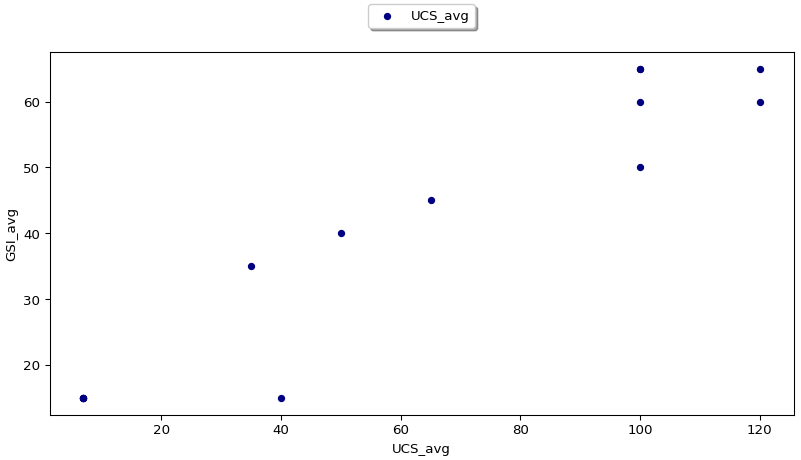

In [9]:
display(data_sel_df)  #pixiedustinspections = pixiedust.sampleData display